In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling
from pandas_profiling import ProfileReport
%matplotlib inline

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from googletrans import Translator
from sklearn.impute import SimpleImputer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.impute import KNNImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, StratifiedKFold

from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance

from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')

XGBoost Accuracy: 0.9901
XGBoost Recall: 0.2233
XGBoost Precision: 0.5820


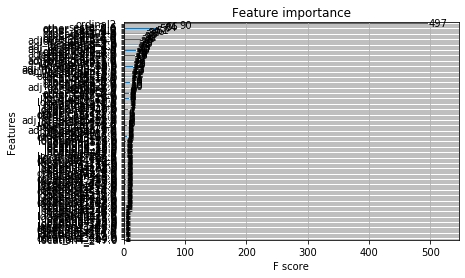

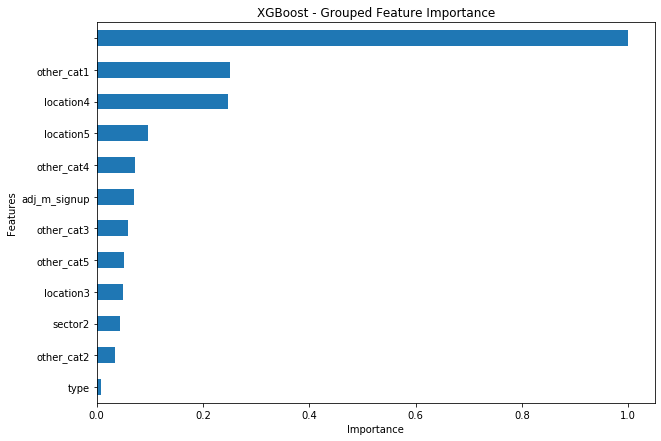

In [2]:
# Load cleaned data
df = pd.read_pickle('df_impute.pkl')

# Transform ordinal
## Ordinal2
df.ordinal2 = df.ordinal2.replace(0,1)
df['ordinal2']= ss.boxcox(df.ordinal2, -0.1911)

## Ordinal1
df['ordinal1']= ss.boxcox(df.ordinal1, -1)

# Specify categorical columns
cat_cols = [x for x in df.columns if x not in ['ordinal1', 'ordinal2', 'label']]

# Convert categorical to str
for col in cat_cols:
    df[col]=df[col].astype(str)
    
# Prepare for modeling
X = df.drop(columns = ['label'])
y = [int(x) for x in df.label]

# Create dummies
# Get dummies, append to new dataframe
# One hot encoding
X_dummies = X.copy()

for col in cat_cols:
    X_dummies = pd.concat([X_dummies,pd.get_dummies(X_dummies[col], prefix=col)],axis=1)
    
X_dummies = X_dummies.drop(columns=cat_cols)

# Convert y to integer
y = [int(x) for x in y]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.33, random_state=0)

##### XGB
# Train model
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
print('XGBoost Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('XGBoost Recall: {:.4f}'.format(recall_score(y_test, y_pred)))
print('XGBoost Precision: {:.4f}'.format(precision_score(y_test, y_pred)))

# Plot importance
plot_importance(model)
plt.show()

# Review feature importances - group together
feat_dict = dict(zip(X_train.columns, model.feature_importances_))
unique_features = np.unique(['_'.join(x.split('_')[:-1]) for x in X_train.columns])
#unique_features = [x for x in unique_features if x!='adj_role_information']
full_feat_dict = {x: sum(v for k, v in feat_dict.items() if x in k) for x in unique_features}
#sorted(full_feat_dict.items(), key=lambda x: x[1], reverse=True)

# Visualize Importance
fea_imp = pd.DataFrame({'imp': list(full_feat_dict.values()), 'col': list(full_feat_dict.keys())})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('XGBoost - Grouped Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance')
plt.show()

In [3]:
#### Remove bottom 3
drop_cols = [z for v in [[x for x in X_dummies.columns if x.startswith(y)] for y in ['other_cat2', 'type', 'sector2']] for z in v]
X_dummies = X_dummies[[x for x in X_dummies.columns if x not in drop_cols]]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.33, random_state=0)

##### XGB
# Train model
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
print('XGBoost Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('XGBoost Recall: {:.4f}'.format(recall_score(y_test, y_pred)))
print('XGBoost Precision: {:.4f}'.format(precision_score(y_test, y_pred)))

XGBoost Accuracy: 0.9898
XGBoost Recall: 0.1918
XGBoost Precision: 0.5446
